# CS181_P1 Ensemble Baseline Model Selection

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

## 1. read in and split pre-processed data

In [2]:
###############################################
#       split test and training set           #
###############################################
# 1. read in the selected features
X_train2 = np.loadtxt('X_train2')
X_test2 = np.loadtxt('X_test2')
Y_train = np.loadtxt('Y_train')

In [3]:
# see the shape of data
print("X_train2 before split: ", X_train2.shape)
print("X_test before split: ", X_test2.shape)
print("Y_train before split: ", Y_train.shape)

X_train2 before split:  (1000000, 31)
X_test before split:  (824230, 31)
Y_train before split:  (1000000,)


In [4]:
# 2. split the training and test sets
x_train, x_test, y_train, y_test = train_test_split(X_train2, Y_train, test_size=0.20)

In [5]:
# see the shape of data after split:
print("shape of x_train: ", x_train.shape)
print("shape of x_test: ", x_test.shape)
print("shape of y_train: ", y_train.shape)
print("shape of y_test: ", y_test.shape)

shape of x_train:  (800000, 31)
shape of x_test:  (200000, 31)
shape of y_train:  (800000,)
shape of y_test:  (200000,)


## 2. Baseline Ensemble Methods 
### 1. Bagging

In [6]:
###############################################
#       Baseline Ensemble Methods             #
###############################################
# 1. Bagging
# 1.1 fit the model
from sklearn.ensemble import BaggingRegressor
bag = BaggingRegressor().fit(x_train, y_train)

In [8]:
# 1.2 report R^2 for training and test
bag_pred = bag.predict(x_test)
print("R^2 for training set is: ", r2_score(y_train, bag.predict(x_train)))
print("R^2 for test set is: ", r2_score(y_test, bag_pred))
print("MSE for training set is: ", mean_squared_error(y_train, bag.predict(x_train)))
print("MSE for test set is: ", mean_squared_error(y_test, bag_pred))

R^2 for training set is:  0.554424514515
R^2 for test set is:  0.551654713832
MSE for training set is:  0.0738410750625
MSE for test set is:  0.0744609201652


### 2. Random Forest

In [9]:
# 2.Random Forest
# 2.1 fit the model
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor().fit(x_train, y_train)
RF_pred = RF.predict(x_test)

In [10]:
# 2.2 report R^2 for training and test
print("R^2 for training set is: ", r2_score(y_train, RF.predict(x_train)))
print("R^2 for test set is: ", r2_score(y_test, RF_pred))
print("MSE for training set is: ", mean_squared_error(y_train, RF.predict(x_train)))
print("MSE for test set is: ", mean_squared_error(y_test, RF_pred))

R^2 for training set is:  0.554428569906
R^2 for test set is:  0.551673925462
MSE for training set is:  0.0738404030003
MSE for test set is:  0.0744577295091


### 3. Extremely Randomized Trees

In [11]:
# 3. Extremely Randomized Trees
# 3.1 fit the model
from sklearn.ensemble import ExtraTreesRegressor
ET = ExtraTreesRegressor().fit(x_train, y_train)
ET_pred = ET.predict(x_test)

In [12]:
# 3.2 report R^2 for training and test
print("R^2 for training set is: ", r2_score(y_train, ET.predict(x_train)))
print("R^2 for test set is: ", r2_score(y_test, ET.predict(x_test)))
print("MSE for training set is: ", mean_squared_error(y_train, ET.predict(x_train)))
print("MSE for test set is: ", mean_squared_error(y_test, ET_pred))

R^2 for training set is:  0.554567736433
R^2 for test set is:  0.551733192675
MSE for training set is:  0.073817340228
MSE for test set is:  0.0744478864454


### 4. AdaBoost

In [13]:
# 4. AdaBoost
# 4.1 fit the model
from sklearn.ensemble import AdaBoostRegressor
Ada = AdaBoostRegressor().fit(x_train, y_train)
Ada_pred = Ada.predict(x_test)

In [14]:
# 4.2 report R^2 for training and test
print("R^2 for training set is: ", r2_score(y_train, Ada.predict(x_train)))
print("R^2 for test set is: ", r2_score(y_test, Ada.predict(x_test)))
print("MSE for training set is: ", mean_squared_error(y_train, Ada.predict(x_train)))
print("MSE for test set is: ", mean_squared_error(y_test, Ada_pred))

R^2 for training set is:  0.383773996555
R^2 for test set is:  0.382259243271
MSE for training set is:  0.102121395943
MSE for test set is:  0.102594019807


In [18]:
Ada_MSE = mean_squared_error(y_test, Ada_pred)
ET_MSE = mean_squared_error(y_test, ET_pred)
RF_MSE = mean_squared_error(y_test, RF_pred)
bag_MSE = mean_squared_error(y_test, bag_pred)

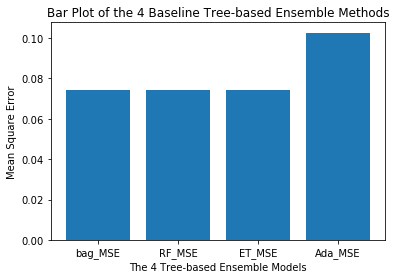

In [23]:
D = {"bag_MSE":bag_MSE, "RF_MSE": RF_MSE, "ET_MSE":ET_MSE, "Ada_MSE":Ada_MSE}
plt.bar(range(len(D)), D.values(), align='center')
plt.xticks(range(len(D)), D.keys())
plt.xlabel("The 4 Tree-based Ensemble Models")
plt.ylabel("Mean Square Error")
plt.title("Bar Plot of the 4 Baseline Tree-based Ensemble Methods")
plt.savefig('MSE_ensemble.png')
plt.show()


### 5. Gradient Tree Boosting

In [19]:
# 5. Gradient Tree Boosting
# 5.1 fit the model
#from sklearn.ensemble import GradientBoostingRegressor
#GTB = GradientBoostingRegressor().fit(x_train, y_train)

In [20]:
# 5.2 report R^2 for training and test
#print("R^2 for training set is: ", r2_score(y_train, GTB.predict(x_train)))
#print("R^2 for test set is: ", r2_score(y_test, GTB.predict(x_test)))

R^2 for training set is:  0.505637822076
R^2 for test set is:  0.506624832132


### 6. SVM(abolished)

In [ ]:
#clf = svm.SVR().fit(X_train2, Y_train)

In [ ]:
#r2_score(Y_train, clf.predict(X_train2))

### R^2 of the split test set:
**Extremely Randomized Trees > Bagging > Random Forest > Gradient Tree Boosting >> AdaBoost**

Thus, next step, we just tune: Random Forest (Extremely Randomized Trees can be better, it time allowed)

## 3. Generate Prediciton on Test

In [26]:
# function to generate prediciton on test set
def write_to_file(filename, predictions):
    with open(filename, "w") as f:
        f.write("Id,Prediction\n")
        for i,p in enumerate(predictions):
            f.write(str(i+1) + "," + str(p) + "\n")

In [27]:
ET_pred = ET.predict(X_test2)
write_to_file("ET.csv", ET_pred)
# Final Score from Camelot: 0.27215

In [31]:
bag_pred = bag.predict(X_test2)
write_to_file("bag.csv", bag_pred)
# Final Score from Camelot: 0.27218

In [32]:
RF_pred = RF.predict(X_test2)
write_to_file("RF.csv", RF_pred)
# Final Score from Camelot: 0.27217

In [33]:
GTB_pred = GTB.predict(X_test2)
write_to_file("GTB.csv", GTB_pred)
# Final Score from Camelot: 0.28571

### R^2 of Camelot
**Extremely Randomized Trees > Random Forest > Bagging > Gradient Tree Boosting**